# Gempy Methods and Features
In this notebook, we present some of the main features of GemPy (and the corresponding methods used), which will be useful for the [PS Geothermie Aargau](https://geg.ethz.ch/project-geothermal_aargau/) study. 

That means, we will look at *input data*, *model generation*, *visualization*, *changing models*, *export*. The majority of these features can already be tested in the [GemPy tutorials](https://www.gempy.org/tutorials). Here, we showcase the features and necessary methods in a rather short form.  

# Input data
Input data in GemPy is based on the `csv` format, i.e. comma-separated-values. While the type of data may seem natural to geologists, it won't hurt to explain it a bit more.

In geology, rock units with different properties are stacked on top of each other with the younger rocks lying on top of older rocks. Presuming of course, nothing else (i.e. tectonics) happened to them afterwards. The interface between different rock units can be mapped, e.g. in classical field work at the earth's surface, or on seismic sections and in boreholes in the subsurface.  
To specify a point in space, you need its coordinates, i.e. `x`, `y`, and `z`. But since these interfaces are, e.g. outcrops, roughly a 2D line, but in reality a surface in 3D, we need more information than just coordinates. To define a plane in 3D, we need its orientation, which usually is defined by *azimuth* and *inclination*, i.e. *angle deviation from north* and *angle deviation from the horizontal plan*. Geologists in the field measure these angles with a compass for instance. 

In summary, GemPy input data comprises two types interface points:  

| x  | y  | z  | Formation  |  
|--:|--:|--:|---|  
|  200 | 250  | 520  | sandstone  |  
|  400 | 250  | 550  | sandstone  |  
|  200 | 550  | 700  | limestone  |  

 and orientation points:  
 
| x  |  y |  z |  azimuth | dip  | polarity  |  Formation |
|--:|--:|--:|--:|--:|--:|---|
| 300  | 250  | 545  | 90  | 10  |  1 | sandstone  |
|  300 |  550 |  680 |  90 | 15  |  1 | limestone  |

In [1]:
# import libraries
import gempy as gp
import matplotlib.pyplot as plt
%matplotlib inline

With this two data types, we can set up a model in GemPy. This can be done in two ways (currently). Either by first defining the `model` and then assigning the input data, or by doing it in one step via `create_data`.

In [2]:
# 1st option
geo_model = gp.create_model('Trough')

# set model extent and feed it some input data
gp.init_data(geo_model, [0, 400., 0, 1400., 0, 1000.], [8, 100, 100],
                        path_o = '../data/graben_test_orientations.csv',
                        path_i = '../data/graben_test_interfaces.csv', default_values=False);

Active grids: ['regular']


In [ ]:
# 2nd option
geo_model = gp.create_data([0, 400., 0, 1400., 0, 1000.], [8, 100, 100],
                        path_o = '../data/graben_test_orientations.csv',
                        path_i = '../data/graben_test_interfaces.csv', default_values=False);

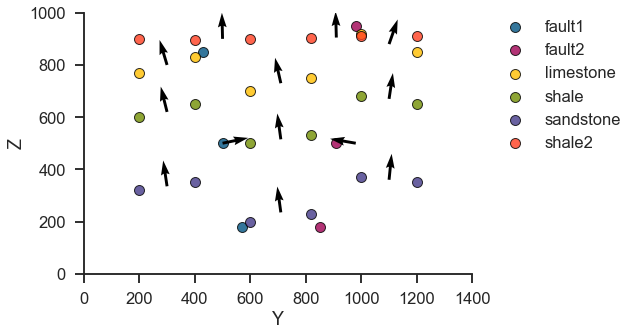

In [3]:
# display of the data we loaded
gp.plot.plot_data(geo_model, direction='x')